In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
print("Train Dataset shape:", train.shape)

test = pd.read_csv('test.csv')
print("Test Dataset shape:", test.shape)

Train Dataset shape: (404290, 6)
Test Dataset shape: (2345796, 3)


In [3]:
train.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       2
is_duplicate    0
dtype: int64

In [4]:
train = train.dropna()
train.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [5]:
train.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404288 entries, 0 to 404289
Data columns (total 6 columns):
id              404288 non-null int64
qid1            404288 non-null int64
qid2            404288 non-null int64
question1       404288 non-null object
question2       404288 non-null object
is_duplicate    404288 non-null int64
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [7]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
train.tail()

,id,qid1,qid2,question1,question2,is_duplicate
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [9]:
train[train['is_duplicate']==1].head()

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1


In [10]:
train[train['is_duplicate']==0].head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [11]:
train['is_duplicate'].value_counts()

0    255025
1    149263
Name: is_duplicate, dtype: int64

In [12]:
print(" Number of duplicate questions :", (train[train['is_duplicate']==1].shape[0]))
print(" percentage of duplicate questions :", (train[train['is_duplicate']==1].shape[0]/float(train.shape[0]))* 100)
print(" Number of non-duplicate questions :", (train[train['is_duplicate']==0].shape[0]))
print(" percentage of non-duplicate questions :", (train[train['is_duplicate']==0].shape[0]/float(train.shape[0]))* 100)

 Number of duplicate questions : 149263
 percentage of duplicate questions : 36.91996794364413
 Number of non-duplicate questions : 255025
 percentage of non-duplicate questions : 63.08003205635586


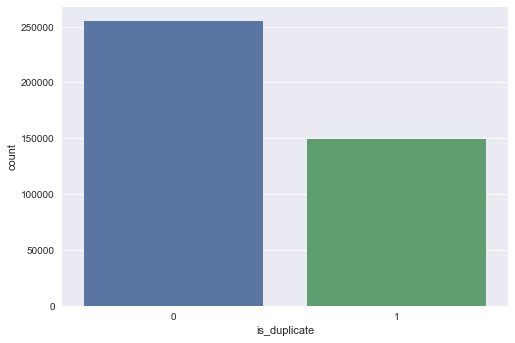

In [13]:
sns.countplot(train['is_duplicate'])

# Feature Construction

In [14]:
train['question1'].str.len().head()

0    66
1    51
2    73
3    50
4    76
Name: question1, dtype: int64

In [15]:
train2 = train

In [16]:
train2['q1len'] = train2['question1'].str.len()
train2['q2len'] = train2['question2'].str.len()

In [17]:
train2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39


In [18]:
train2['q1_n_words'] = train2['question1'].apply(lambda row: len(row.split(" ")))
train2['q2_n_words'] = train2['question2'].apply(lambda row: len(str(row).split(" ")))

In [19]:
train2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7


In [20]:
def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip() , row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), str(row['question2']).split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

train2['word_share'] = train2.apply(normalized_word_share, axis=1)

train2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,0.100000


------------------------

## Cosine similarity

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
corpus =pd.concat([train.question1,train.question2])

In [31]:
print(corpus.shape)
corpus.head()

(808576,)


0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [32]:
cv = CountVectorizer().fit(corpus)

In [33]:
duplicates = train.loc[train.is_duplicate==1,['question1','question2']]
nondupes = train.loc[train.is_duplicate==0,['question1','question2']]

In [34]:
duplicates.head()

,question1,question2
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan..."
7,How can I be a good geologist?,What should I do to be a great geologist?
11,How do I read and find my YouTube comments?,How can I see all my Youtube comments?
12,What can make Physics easy to learn?,How can you make physics easy to learn?
13,What was your first sexual experience like?,What was your first sexual experience?


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
non_dupes_csim = []

for j in range(nondupes.shape[0]):
    
    a = cv.transform([nondupes.iloc[j].question1])
    b = cv.transform([nondupes.iloc[j].question2])
    
    non_dupes_csim.append( cosine_similarity(a,b).ravel()[0])

In [37]:
duplicates_csim = []

for j in range(duplicates.shape[0]):
    
    a = cv.transform([duplicates.iloc[j].question1])
    b = cv.transform([duplicates.iloc[j].question2])
    
    duplicates_csim.append( cosine_similarity(a,b).ravel()[0])

In [38]:
np.mean(non_dupes_csim)

0.43451255281125706

In [39]:
np.mean(duplicates_csim)

0.62474952747532486

(array([ 1.05396045,  1.00699735,  1.35611855,  1.44533275,  1.29717907,
         1.10693138,  0.7944461 ,  0.7390799 ,  0.67452526,  0.52542919]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

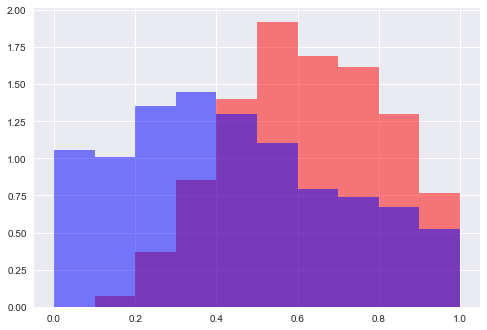

In [41]:
plt.hist(duplicates_csim, alpha = 0.5, color = 'r', normed = True, bins = np.linspace(0,1,11))
plt.hist(non_dupes_csim, alpha = 0.5, color = 'b', normed = True, bins = np.linspace(0,1,11))

-------